In [11]:
import matplotlib.pyplot as plt
import random
import numpy as np

**Problema 1**: Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade
de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para
entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de
energia. Considere a distribuição de Boltzmann para o problema do oscilador harmônico *clássico*:

$$
P(x) \propto e^{-\beta E(x)}, \text{ com } E(x) = \frac{1}{2} kx^2,
$$

onde $β = 1/k_BT$ , $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a
distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma = \frac{1}{\beta k}$.


**(a)** Gere valores aleatórios de $x$ a partir de uma distribuição uniforme e aceite-os com probabilidade
proporcional a $P (x)$ (método de rejeição). Assim, obtém-se uma amostra de valores de $x$ que
devem refletir a distribuição de Boltzmann. 


**(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica. 

**(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:

$$
P_{teórica} (x) = \sqrt{\frac{\beta k}{2\pi}} exp(-\frac{\beta k x^2}{2})
$$

**(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:

$$
\mathbb{E}[x] = 0, Var(x) = 1
βk .
$$

**(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quan-
titativamente se as amostras são consistentes com a distribuição teórica. (**f**) Crie um Q-Q plot
para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a dis-
tribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a
variância, bem como testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas
da qualidade da aproximação Monte Carlo à solução analítica

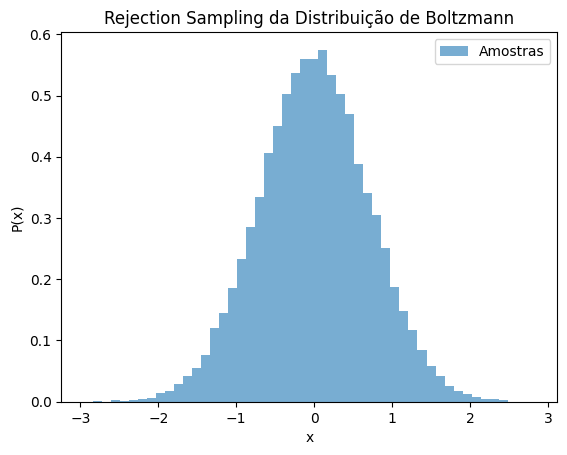

In [66]:
# Considerando k = kb = T = 1
k = 1.0  # Constante de força
kb = 1.0  # Constante de Boltzmann
T = 1.0  # Temperatura
beta = 1 / (kb * T) 

# Energia de Boltzmann
def E(x):
    return k * x ** 2 / 2

# Distribuição de Boltzmann (não-normalizada)
def P(x):
    return np.exp((-k * x ** 2) / kb * T)

# Distribuição proposta (uniforme) no intervalo [-a, a]
#a = 1
#a = 3
def g(a, x):
    return 1 / (2 * a) if -a <= x <= a else 0

# Rejection Sampling

# Devemos gerar um número aleatório uniforme [0, 1], se  u <= P(x')/M*g(x'), devemos aceitar x'. Onde x' é obtido de forma uniforme no intervalo [-a, a] (x_prop)
def rejection_sampling(a, n_samples):
    samples = []
    
    # Valor de M que faz com que Mg(x) >= P(x) para todos x no intervalo de interesse [-a, a]
    M = max([P(y) / g(a, y) for y in np.linspace(-a, a, 1000)])
    while len(samples) < n_samples:
        # Amostra da proposta
        x_prop = np.random.uniform(-a, a)
        u = np.random.uniform(0, 1)
        
        # Verificar aceitação
        if u <= P(x_prop) / (M * g(a, x_prop)):
            samples.append(x_prop)
    return np.array(samples)

# Determina largura da gaussiana
a = 5
n_samples = 50000
# Retorna lista de valores aceitos
samples = rejection_sampling(a, n_samples)
print(samples)
# Visualizar os resultados
x = np.linspace(-a, a, 1000)
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Amostras")
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Rejection Sampling da Distribuição de Boltzmann")
plt.show()

In [54]:
a = P(samples) / sum(P(samples))
print(max(a))

0.0001420457468616995
